<a href="https://colab.research.google.com/github/virbickt/default-risk-prediction/blob/main/exploratory_data_analysis_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Missing values

Exploratory data analysis inevitable leads us to the issue of missing values.  Let us first identify the number of features with values missing across the tables:

In [ ]:
datasets = [
    app_train,
    app_train,
    bureau,
    bureau_balance,
    cash,
    credit,
    previous,
    installments,
]
dataset_names = [
    "app_df",
    "app_train",
    "bureau",
    "bureau_balance",
    "cash",
    "credit",
    "previous",
    "installments",
]

for df, df_name in zip(datasets, dataset_names):
    print(
        f"Number of columns with missing values in {df_name}:",
        df.isna().any().sum(),
        f"of {df.shape[1]}",
    )

Number of columns with missing values in app_df: 69 of 122
Number of columns with missing values in app_train: 69 of 122
Number of columns with missing values in bureau: 7 of 17
Number of columns with missing values in bureau_balance: 0 of 4
Number of columns with missing values in cash: 2 of 9
Number of columns with missing values in credit: 9 of 24
Number of columns with missing values in previous: 16 of 37
Number of columns with missing values in installments: 2 of 9


While we've seen hints of the volume of values missing in `application_train`, we can now see that there's a little more than half of the features across the train and test sets. In what follows we will look into the percentages of missing values across the features in train and test sets. 

In [ ]:
missing_train = missing_values_pct(app_train)
missing_test = missing_values_pct(app_test)

display_side_by_side([missing_test, missing_train], ["caption1", "caption2"])

Let us see whether there are features among those in test set that have more values missing than those in the train set.

In [ ]:
for col1, col2 in zip(app_train.columns, app_test.columns):
  if app_train[col1].isna().sum() < app_test[col2].isna().sum():
    print(f"There are more missing values for {col2} in test set than in {col1} in train set")
    print(f'The difference is {app_test[col2].isna().sum() - app_train[col1].isna().sum()} values')

Since there's only one feature that has more values missing, it seems safe to proceed with further investigation of missing values by taking the train set as a representative.

## Missing values (train set)

Let us use `missingno` to see the counts of missing values across the features visually

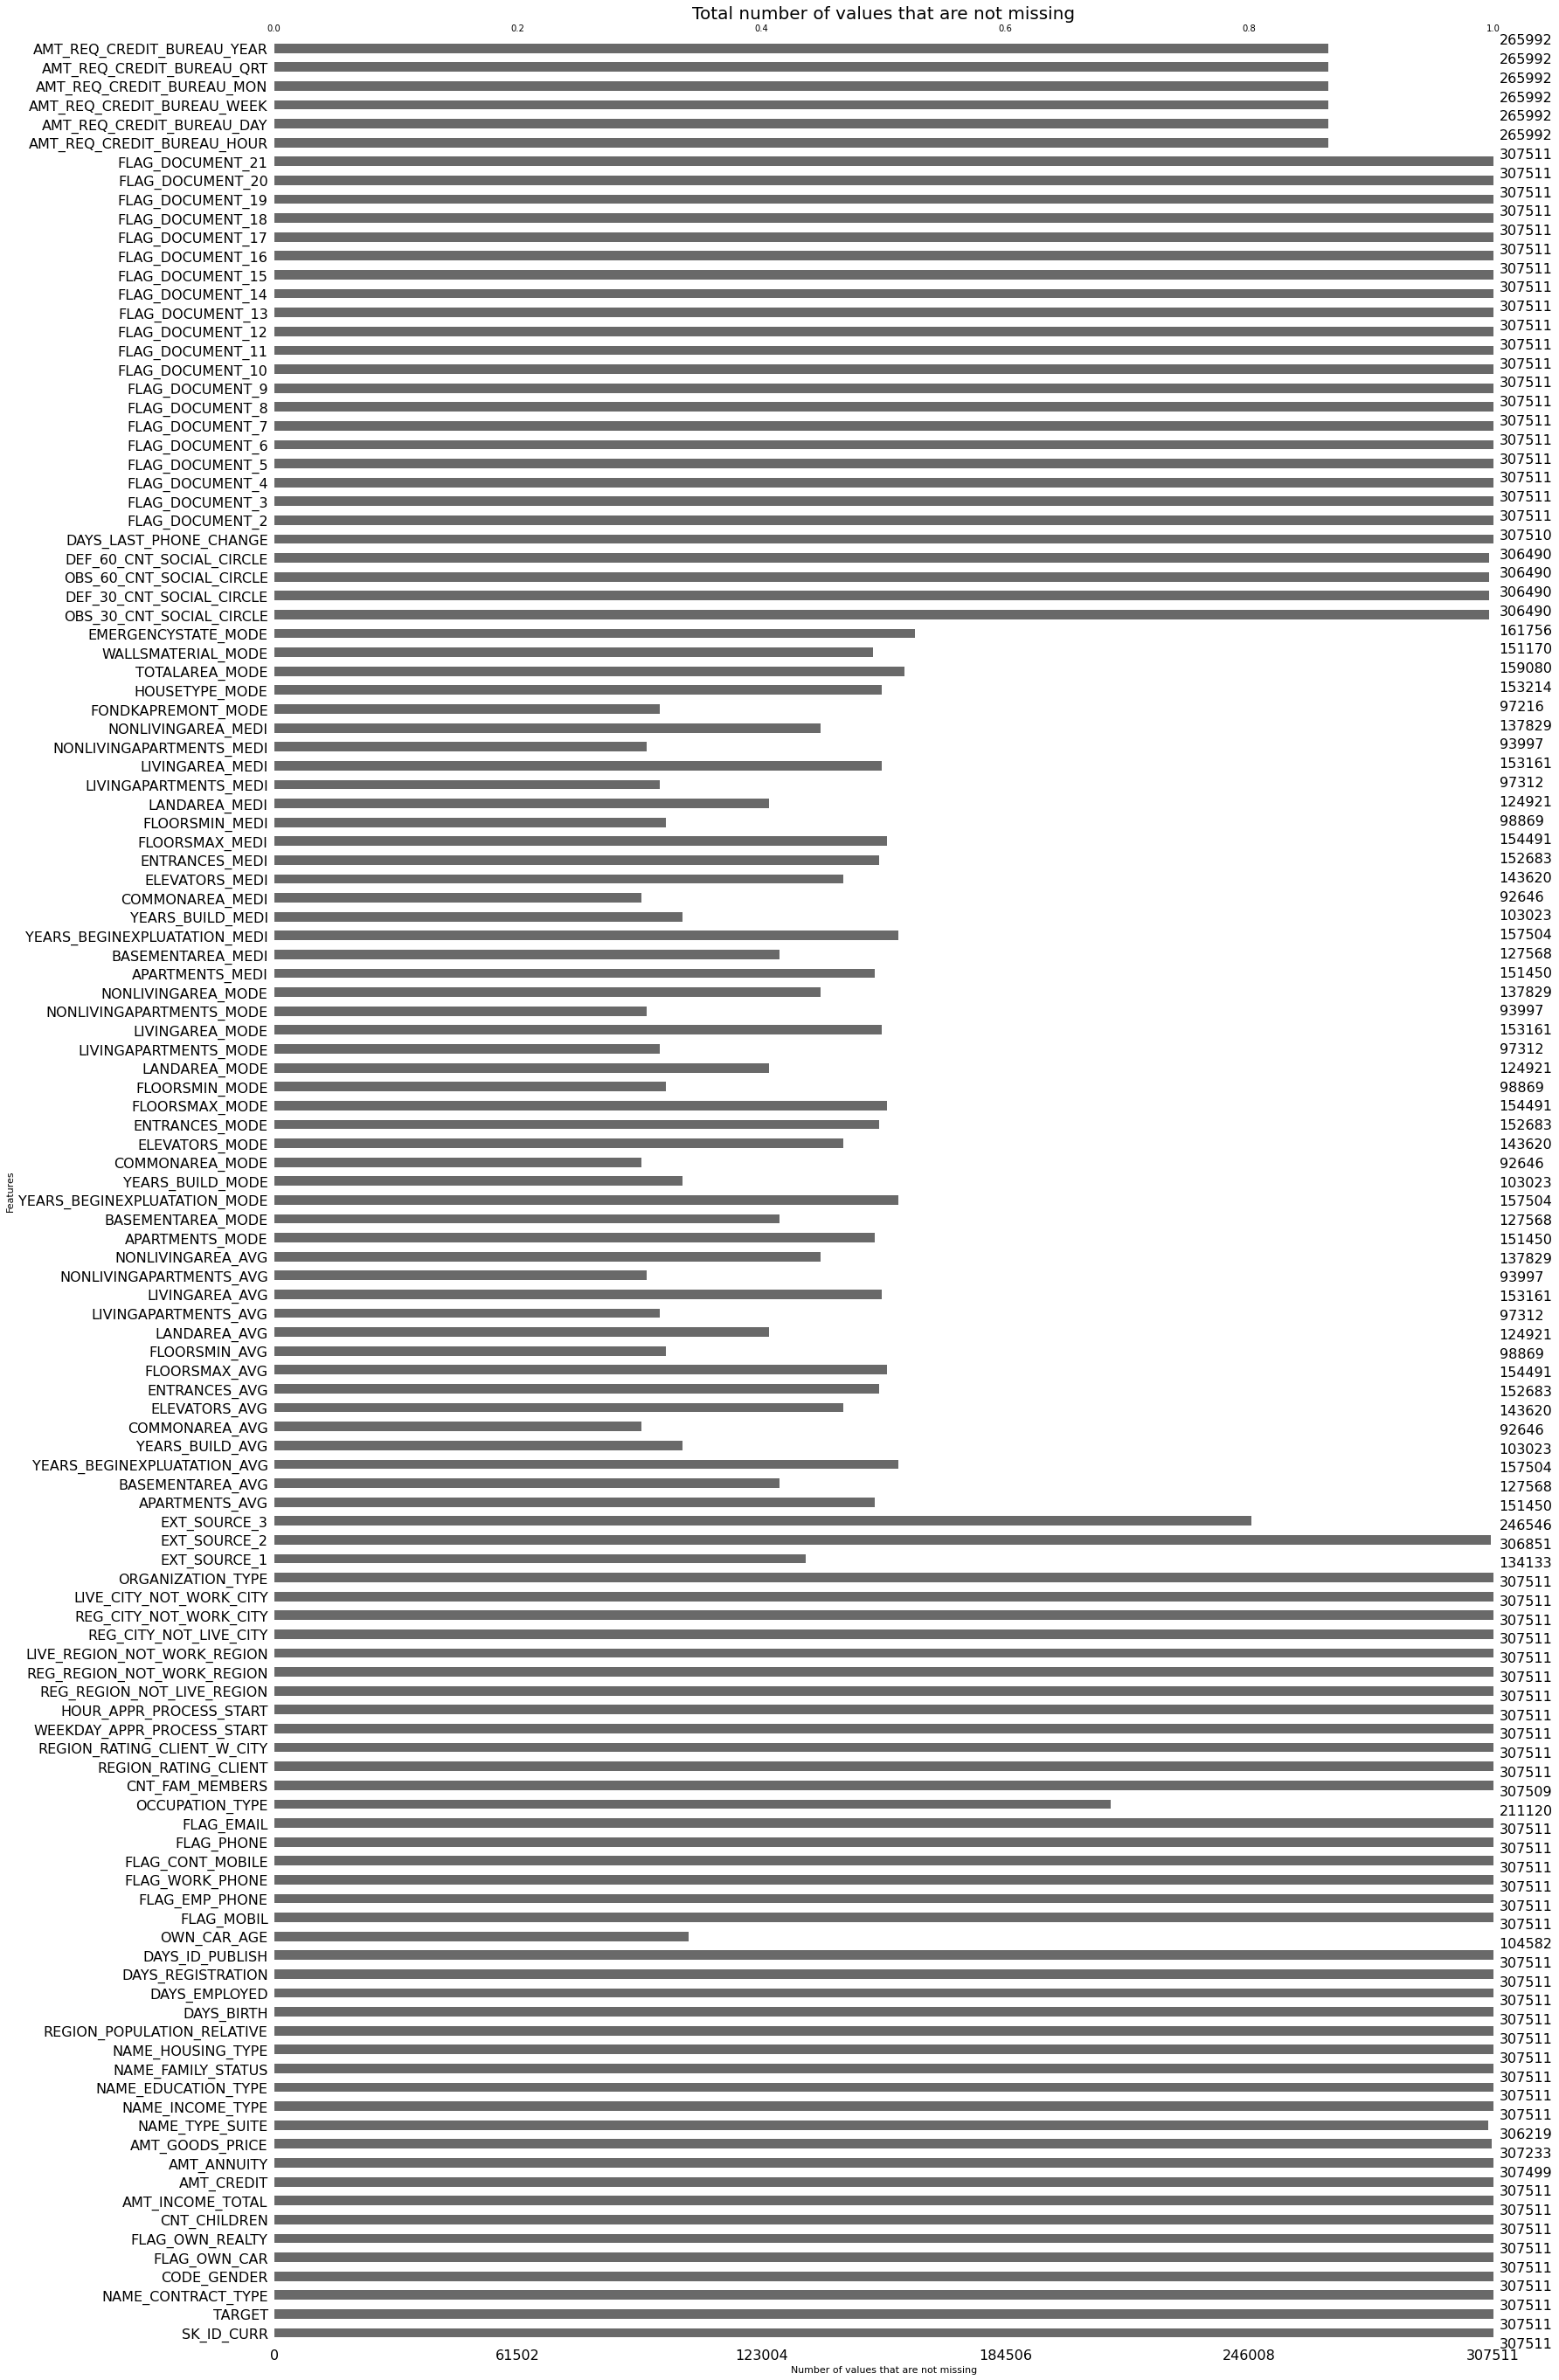

In [ ]:
plt.title("Total number of values that are not missing", fontsize=20)
plt.ylabel("Features", fontsize=11)
plt.xlabel("Number of values that are not missing", fontsize=11)
msno.bar(app_train)

## Flagging missing values

In what follows we will be making changes to the data, so before we proceed, let us first add a feature that tracks the number of missing feature for each applicant. `FLAG_INCOMPLETE` will represent whether there were 35 or more values missing across the total of 122 features that represent a single applicant whereas `MISSING_COUNT_INFO` tracks the precise number of values missing per applicant. 

In [ ]:
for df in [app_train, app_test]:
  df['FLAG_INCOMPLETE'] = 1
  df.loc[df.isnull().sum(axis=1) < 35, 'FLAG_INCOMPLETE'] = 0
  df['MISSING_INFO_COUNT'] = df.isnull().sum(axis=1)

### Missing values (train set): First block

The features with missing values can be grouped into three groups that we will zoom onto sequentially. First, there's `AMT_CREDIT_BUREAU` features that tracks the number of enquirees to Credit Bureau about the client on different time intervals:

In [ ]:
amt_req_credit_bureau = [
    "AMT_REQ_CREDIT_BUREAU_YEAR",
    "AMT_REQ_CREDIT_BUREAU_QRT",
    "AMT_REQ_CREDIT_BUREAU_MON",
    "AMT_REQ_CREDIT_BUREAU_WEEK",
    "AMT_REQ_CREDIT_BUREAU_DAY",
    "AMT_REQ_CREDIT_BUREAU_HOUR",
]

missing_values_pct(app_train[amt_req_credit_bureau])

,Total,Percentage
AMT_REQ_CREDIT_BUREAU_YEAR,41519,0.135016
AMT_REQ_CREDIT_BUREAU_QRT,41519,0.135016
AMT_REQ_CREDIT_BUREAU_MON,41519,0.135016
AMT_REQ_CREDIT_BUREAU_WEEK,41519,0.135016
AMT_REQ_CREDIT_BUREAU_DAY,41519,0.135016
AMT_REQ_CREDIT_BUREAU_HOUR,41519,0.135016


From the column description we know that these variables are mutually disjoint - the weekly data does not include the daily data and so forth. Therefore, the fact that there's exactly the same amount of values missing across these features that represent the number of requests on the applicant across different times intervals suggests the there have inquires on the applicant at all: nor during the last hours, nor during the last week, *et cetera*.



In [ ]:
for df in [app_train, app_test]:
    df.loc[
        (df["AMT_REQ_CREDIT_BUREAU_HOUR"].isna())
        & (df["AMT_REQ_CREDIT_BUREAU_DAY"].isna())
        & (df["AMT_REQ_CREDIT_BUREAU_WEEK"].isna())
        & (df["AMT_REQ_CREDIT_BUREAU_MON"].isna())
        & (df["AMT_REQ_CREDIT_BUREAU_QRT"].isna())
        & (df["AMT_REQ_CREDIT_BUREAU_YEAR"].isna()),
        "AMT_REQ_CREDIT_BUREAU_HOUR",
    ] = 0

    df.loc[
        (df["AMT_REQ_CREDIT_BUREAU_HOUR"] == 0)
        & (df["AMT_REQ_CREDIT_BUREAU_DAY"].isna())
        & (df["AMT_REQ_CREDIT_BUREAU_WEEK"].isna())
        & (df["AMT_REQ_CREDIT_BUREAU_MON"].isna())
        & (df["AMT_REQ_CREDIT_BUREAU_QRT"].isna())
        & (df["AMT_REQ_CREDIT_BUREAU_YEAR"].isna()),
        "AMT_REQ_CREDIT_BUREAU_DAY",
    ] = 0

    df.loc[
        (df["AMT_REQ_CREDIT_BUREAU_HOUR"] == 0)
        & (df["AMT_REQ_CREDIT_BUREAU_DAY"] == 0)
        & (df["AMT_REQ_CREDIT_BUREAU_WEEK"].isna())
        & (df["AMT_REQ_CREDIT_BUREAU_MON"].isna())
        & (df["AMT_REQ_CREDIT_BUREAU_QRT"].isna())
        & (df["AMT_REQ_CREDIT_BUREAU_YEAR"].isna()),
        "AMT_REQ_CREDIT_BUREAU_WEEK",
    ] = 0

    df.loc[
        (df["AMT_REQ_CREDIT_BUREAU_HOUR"] == 0)
        & (df["AMT_REQ_CREDIT_BUREAU_DAY"] == 0)
        & (df["AMT_REQ_CREDIT_BUREAU_WEEK"] == 0)
        & (df["AMT_REQ_CREDIT_BUREAU_MON"].isna())
        & (df["AMT_REQ_CREDIT_BUREAU_QRT"].isna())
        & (df["AMT_REQ_CREDIT_BUREAU_YEAR"].isna()),
        "AMT_REQ_CREDIT_BUREAU_MON",
    ] = 0

    df.loc[
        (df["AMT_REQ_CREDIT_BUREAU_HOUR"] == 0)
        & (df["AMT_REQ_CREDIT_BUREAU_DAY"] == 0)
        & (df["AMT_REQ_CREDIT_BUREAU_WEEK"] == 0)
        & (df["AMT_REQ_CREDIT_BUREAU_MON"] == 0)
        & (df["AMT_REQ_CREDIT_BUREAU_QRT"].isna())
        & (df["AMT_REQ_CREDIT_BUREAU_YEAR"].isna()),
        "AMT_REQ_CREDIT_BUREAU_QRT",
    ] = 0

    df.loc[
        (df["AMT_REQ_CREDIT_BUREAU_HOUR"] == 0)
        & (df["AMT_REQ_CREDIT_BUREAU_DAY"] == 0)
        & (df["AMT_REQ_CREDIT_BUREAU_WEEK"] == 0)
        & (df["AMT_REQ_CREDIT_BUREAU_MON"] == 0)
        & (df["AMT_REQ_CREDIT_BUREAU_QRT"] == 0)
        & (df["AMT_REQ_CREDIT_BUREAU_YEAR"].isna()),
        "AMT_REQ_CREDIT_BUREAU_YEAR",
    ] = 0

### Missing values (train set): Second block

The features in the second block mostly have to do with housing. However, among those features that have half the values missing can still be those who have only a little percent of values missing. To see this, let us zoom in on the remaining features with values missing and plot them again.

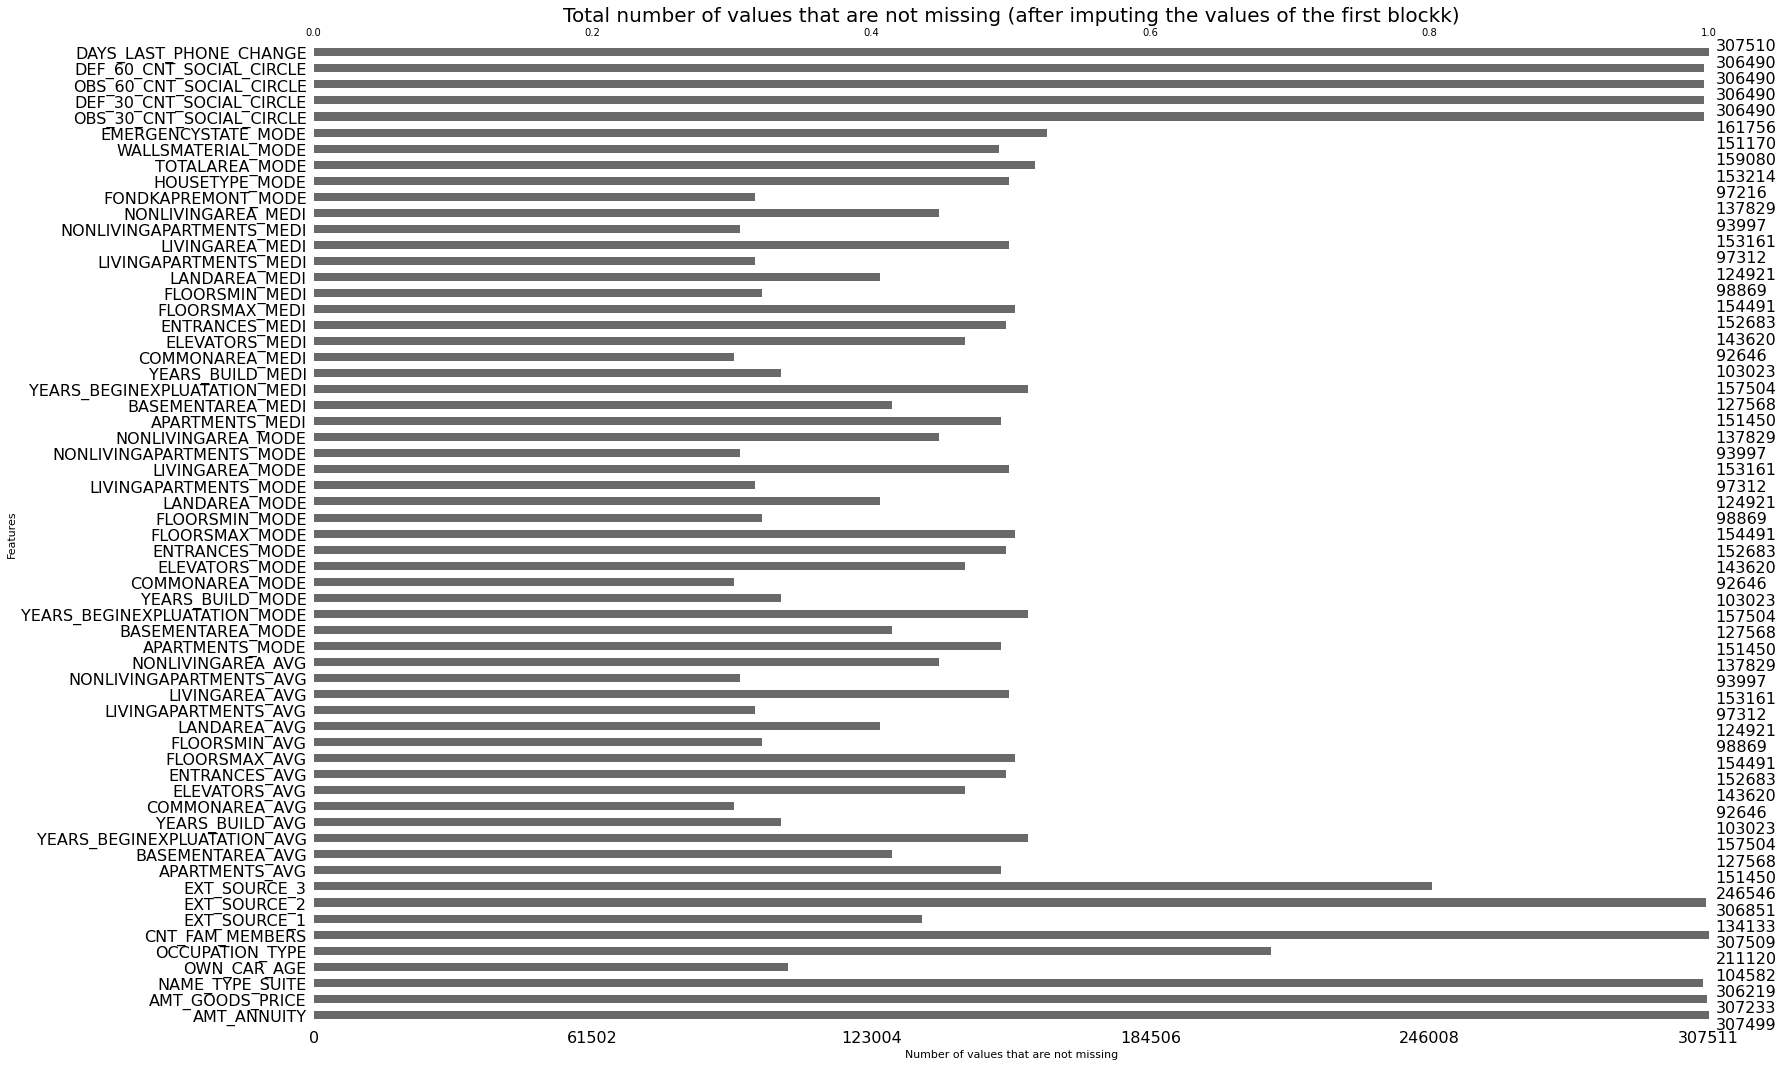

In [ ]:
feats_miss = app_train[app_train.columns[app_train.isnull().any()]]

plt.title("Total number of values that are not missing (after imputing the values of the first blockk)", fontsize=20)
plt.ylabel("Features", fontsize=11)
plt.xlabel("Number of values that are not missing", fontsize=11)

msno.bar(feats_miss)

# Target

We already know that the target variable is binary, which it can only take values `0` (for not defaulting on the loan) and `1` (for defaulting on the loan). Assuming that taking a loan comes as a well-considered decision, we would not expect for a big percent of the total applicants not to pay back their loan within a given time. While this turns out to be the case, we now know that we have a problem of *class-inbalance* on our hands.

In [ ]:
import plotly.graph_objects as go

colors = ['lightslategray',] * 5
colors[1] = 'crimson'

fig = go.Figure(data=[go.Bar(
    x=['0 (will not default)', '1 (will default)'],
    y=[app_train[app_train.TARGET == 0].shape[0], app_train[app_train.TARGET == 1].shape[0]],
    marker_color=colors # marker color can be a single color value or an iterable
)])
fig.update_layout(title_text='Counts of the values of the binary target variable',
    title_font_family="Raleway",
)

fig.show()